<a href="https://colab.research.google.com/github/ManuSinghYadav/Andrej_Karpathy_Zero_to_Hero/blob/main/Makemore_series_Lecture_2_(MLP).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt # for making figures
%matplotlib inline

In [ ]:
# read in all the words
words = open('names.txt', 'r').read().splitlines()
words[:8]

['emma', 'olivia', 'ava', 'isabella', 'sophia', 'charlotte', 'mia', 'amelia']

In [ ]:
len(words)

32033

In [ ]:
# build the vocabulary of characters and mappings to/from integers
chars = sorted(list(set(''.join(words))))
stoi = {s:i+1 for i,s in enumerate(chars)}
stoi['.'] = 0
itos = {i:s for s,i in stoi.items()}
print(itos)

{1: 'a', 2: 'b', 3: 'c', 4: 'd', 5: 'e', 6: 'f', 7: 'g', 8: 'h', 9: 'i', 10: 'j', 11: 'k', 12: 'l', 13: 'm', 14: 'n', 15: 'o', 16: 'p', 17: 'q', 18: 'r', 19: 's', 20: 't', 21: 'u', 22: 'v', 23: 'w', 24: 'x', 25: 'y', 26: 'z', 0: '.'}


In [ ]:
words_ = ['...' + w + '.' for w in words[:5]]
words_[:10]

['...emma.', '...olivia.', '...ava.', '...isabella.', '...sophia.']

In [ ]:
# build the dataset

X, Y = [], []
for w in words: # Iterate through the first 5 words
  # Add padding to the beginning and end of each word
  w_padded = '...' + w + '.'
  for i in range(len(w_padded) - 3): # Iterate through the padded word to create 3-character inputs and 1-character targets
    X.append([stoi[w_padded[i]], stoi[w_padded[i+1]], stoi[w_padded[i+2]]])
    Y.append(stoi[w_padded[i+3]])

X, Y = torch.tensor(X), torch.tensor(Y)

In [ ]:
X.shape

torch.Size([32, 3])

In [ ]:
g= torch.Generator().manual_seed(2147483647)
C = torch.randn((27, 2), generator=g)

In [ ]:
C

tensor([[ 1.5674, -0.2373],
        [-0.0274, -1.1008],
        [ 0.2859, -0.0296],
        [-1.5471,  0.6049],
        [ 0.0791,  0.9046],
        [-0.4713,  0.7868],
        [-0.3284, -0.4330],
        [ 1.3729,  2.9334],
        [ 1.5618, -1.6261],
        [ 0.6772, -0.8404],
        [ 0.9849, -0.1484],
        [-1.4795,  0.4483],
        [-0.0707,  2.4968],
        [ 2.4448, -0.6701],
        [-1.2199,  0.3031],
        [-1.0725,  0.7276],
        [ 0.0511,  1.3095],
        [-0.8022, -0.8504],
        [-1.8068,  1.2523],
        [ 0.1476, -1.0006],
        [-0.5030, -1.0660],
        [ 0.8480,  2.0275],
        [-0.1158, -1.2078],
        [-1.0406, -1.5367],
        [-0.5132,  0.2961],
        [-1.4904, -0.2838],
        [ 0.2569,  0.2130]])

In [ ]:
X[0]

tensor([0, 0, 0])

In [ ]:
emb = C[X]
emb

tensor([[[ 0.5860, -0.4182],
         [ 0.5860, -0.4182],
         [ 0.5860, -0.4182]],

        [[ 0.5860, -0.4182],
         [ 0.5860, -0.4182],
         [ 0.0246, -0.3751]],

        [[ 0.5860, -0.4182],
         [ 0.0246, -0.3751],
         [ 0.9825, -0.6080]],

        ...,

        [[ 0.0756, -0.2643],
         [ 0.0756, -0.2643],
         [-0.5253,  0.0238]],

        [[ 0.0756, -0.2643],
         [-0.5253,  0.0238],
         [ 0.0756, -0.2643]],

        [[-0.5253,  0.0238],
         [ 0.0756, -0.2643],
         [-0.5691,  0.1881]]], grad_fn=<IndexBackward0>)

In [ ]:
emb.shape

torch.Size([228146, 3, 2])

In [ ]:
X.shape

torch.Size([32, 3])

In [ ]:
emb = emb.view(-1, 6)
emb

tensor([[ 1.5674, -0.2373,  1.5674, -0.2373,  1.5674, -0.2373],
        [ 1.5674, -0.2373,  1.5674, -0.2373, -0.4713,  0.7868],
        [ 1.5674, -0.2373, -0.4713,  0.7868,  2.4448, -0.6701],
        [-0.4713,  0.7868,  2.4448, -0.6701,  2.4448, -0.6701],
        [ 2.4448, -0.6701,  2.4448, -0.6701, -0.0274, -1.1008],
        [ 1.5674, -0.2373,  1.5674, -0.2373,  1.5674, -0.2373],
        [ 1.5674, -0.2373,  1.5674, -0.2373, -1.0725,  0.7276],
        [ 1.5674, -0.2373, -1.0725,  0.7276, -0.0707,  2.4968],
        [-1.0725,  0.7276, -0.0707,  2.4968,  0.6772, -0.8404],
        [-0.0707,  2.4968,  0.6772, -0.8404, -0.1158, -1.2078],
        [ 0.6772, -0.8404, -0.1158, -1.2078,  0.6772, -0.8404],
        [-0.1158, -1.2078,  0.6772, -0.8404, -0.0274, -1.1008],
        [ 1.5674, -0.2373,  1.5674, -0.2373,  1.5674, -0.2373],
        [ 1.5674, -0.2373,  1.5674, -0.2373, -0.0274, -1.1008],
        [ 1.5674, -0.2373, -0.0274, -1.1008, -0.1158, -1.2078],
        [-0.0274, -1.1008, -0.1158, -1.2

In [ ]:
W1 = torch.randn((6, 100))
b1 = torch.randn(100)

In [ ]:
h = torch.tanh((emb @ W1) + b1)
h

tensor([[-0.9003, -0.8095,  0.5931,  ...,  0.9294,  0.9999,  0.8608],
        [-0.6379,  0.9966,  0.9996,  ..., -0.8119,  0.9997,  0.9789],
        [-0.9972, -1.0000, -0.9974,  ...,  0.9996,  0.9743, -0.9962],
        ...,
        [-0.7241, -0.9996, -0.9999,  ...,  0.9493, -0.8442, -0.9919],
        [-0.9469, -0.9881, -0.0828,  ..., -0.9286,  0.9933,  0.9977],
        [-0.9983,  0.9992,  0.9939,  ...,  0.9553,  1.0000,  0.9989]])



nn (1).svg



In [ ]:
W2 = torch.randn(100, 27)
b2 = torch.randn(27)

In [ ]:
logits = (h @ W2) + b2

In [ ]:
counts = logits.exp()
p = counts / counts.sum(1, keepdims=True)

In [ ]:
# Loss = Negitive log likelihood

loss = -p[torch.arange(32), Y].log().mean()
loss

tensor(17.7708)

###Backpropagation

In [ ]:
g = torch.Generator().manual_seed(2147483647)
C = torch.randn((27, 2), generator=g)
W1 = torch.randn((6, 100), generator=g)
b1 = torch.randn(100, generator=g)
W2 = torch.randn((100, 27), generator=g)
b2 = torch.randn(27, generator=g)
parameters = [C, W1, b1, W2, b2]

In [ ]:
# Weights - 600 + 2700 = 3300
# Biases  - 100 + 27   = 127
# C       - 27 * 2     = 54
sum(p.nelement() for p in parameters)

3481

In [ ]:
sum(i.numel() for i in parameters)

3481

In [ ]:
for p in parameters:
  p.requires_grad = True

In [ ]:
for i in range (50):

  # minibatch construct
  ix = torch.randint(0, X.shape[0], (32,))
  emb = C[X[ix]]
  emb = emb.view(-1, 6)
  h = torch.tanh((emb @ W1) + b1)
  logits = (h @ W2) + b2

  # counts = logits.exp()
  # p = counts / counts.sum(1, keepdims=True)
  # loss = -p[torch.arange(len(x)), Y].log().mean() #+ 0.01 * (W1**2).mean() + 0.01 * (W2**2).mean()

  loss = F.cross_entropy(logits, Y[ix])

  print(f'Batch {i} - Loss is {loss.item()}')

  for p in parameters:
    p.grad = None
  loss.backward()
  for p in parameters:
    p.data += -0.1 * p.grad

Batch 0 - Loss is 20.076702117919922
Batch 1 - Loss is 19.677019119262695
Batch 2 - Loss is 15.934829711914062
Batch 3 - Loss is 17.234121322631836
Batch 4 - Loss is 12.935203552246094
Batch 5 - Loss is 12.148683547973633
Batch 6 - Loss is 10.966773986816406
Batch 7 - Loss is 14.518839836120605
Batch 8 - Loss is 8.956764221191406
Batch 9 - Loss is 11.234331130981445
Batch 10 - Loss is 8.802135467529297
Batch 11 - Loss is 9.722161293029785
Batch 12 - Loss is 8.488292694091797
Batch 13 - Loss is 8.202519416809082
Batch 14 - Loss is 10.511065483093262
Batch 15 - Loss is 9.477384567260742
Batch 16 - Loss is 8.2395601272583
Batch 17 - Loss is 8.143611907958984
Batch 18 - Loss is 9.73475170135498
Batch 19 - Loss is 8.126321792602539
Batch 20 - Loss is 9.933849334716797
Batch 21 - Loss is 7.853374004364014
Batch 22 - Loss is 8.433378219604492
Batch 23 - Loss is 7.484184265136719
Batch 24 - Loss is 8.024446487426758
Batch 25 - Loss is 10.04823112487793
Batch 26 - Loss is 7.7250165939331055
Bat

In [ ]:
emb = C[X]
emb = emb.view(-1, 6)
h = torch.tanh((emb @ W1) + b1)
logits = (h @ W2) + b2
loss = F.cross_entropy(logits, Y)
print(f"Loss for the whole dataset - {loss.item()}")

Loss for the whole dataset - 5.4060163497924805


###Learning rate parameter tuning

In [ ]:
lre = torch.linspace(-3, 0, 100)
lre = 10**lre
lre

tensor([0.0010, 0.0011, 0.0011, 0.0012, 0.0013, 0.0014, 0.0015, 0.0016, 0.0017,
        0.0019, 0.0020, 0.0022, 0.0023, 0.0025, 0.0027, 0.0028, 0.0031, 0.0033,
        0.0035, 0.0038, 0.0040, 0.0043, 0.0046, 0.0050, 0.0053, 0.0057, 0.0061,
        0.0066, 0.0071, 0.0076, 0.0081, 0.0087, 0.0093, 0.0100, 0.0107, 0.0115,
        0.0123, 0.0132, 0.0142, 0.0152, 0.0163, 0.0175, 0.0187, 0.0201, 0.0215,
        0.0231, 0.0248, 0.0266, 0.0285, 0.0305, 0.0327, 0.0351, 0.0376, 0.0404,
        0.0433, 0.0464, 0.0498, 0.0534, 0.0572, 0.0614, 0.0658, 0.0705, 0.0756,
        0.0811, 0.0870, 0.0933, 0.1000, 0.1072, 0.1150, 0.1233, 0.1322, 0.1417,
        0.1520, 0.1630, 0.1748, 0.1874, 0.2009, 0.2154, 0.2310, 0.2477, 0.2656,
        0.2848, 0.3054, 0.3275, 0.3511, 0.3765, 0.4037, 0.4329, 0.4642, 0.4977,
        0.5337, 0.5722, 0.6136, 0.6579, 0.7055, 0.7565, 0.8111, 0.8697, 0.9326,
        1.0000])

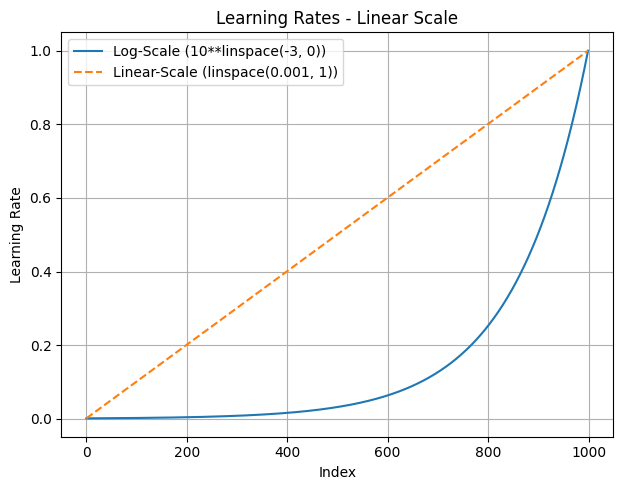

So now you're seeing why we're taking the log values instead of linear values of arange or linspace

In [ ]:
lri, lossi = [], []

for i in range(10000):

  # minibatch construct
  ix = torch.randint(0, X.shape[0], (32,))
  emb = C[X[ix]]
  emb = emb.view(-1, 6)
  h = torch.tanh((emb @ W1) + b1)
  logits = (h @ W2) + b2

  # counts = logits.exp()
  # p = counts / counts.sum(1, keepdims=True)
  # loss = -p[torch.arange(len(x)), Y].log().mean() #+ 0.01 * (W1**2).mean() + 0.01 * (W2**2).mean()

  loss = F.cross_entropy(logits, Y[ix])

  #print(f'Batch {i} - Loss is {loss.item()}')

  for p in parameters:
    p.grad = None
  loss.backward()

  # lr = lre[i]
  lr = 0.001

  for p in parameters:
    p.data += -lr * p.grad

  # lri.append(lr)
  # lossi.append(loss.item())

print(loss.item())

3.382711887359619


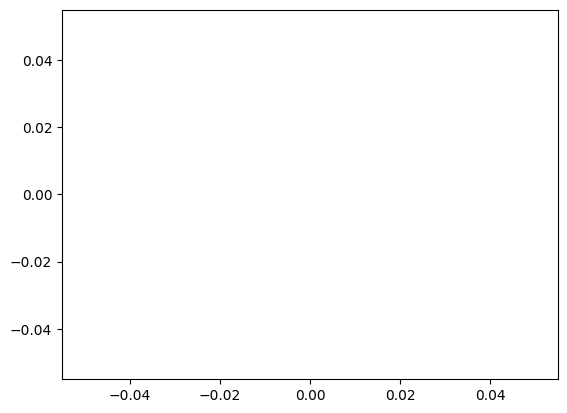

In [ ]:
plt.plot(lri, lossi)

###Train test split


In [ ]:
# build the dataset
block_size = 3 # context length: how many characters do we take to predict the next one?

def build_dataset(words):
  X, Y = [], []
  for w in words:

    #print(w)
    context = [0] * block_size
    for ch in w + '.':
      ix = stoi[ch]
      X.append(context)
      Y.append(ix)
      #print(''.join(itos[i] for i in context), '--->', itos[ix])
      context = context[1:] + [ix] # crop and append

  X = torch.tensor(X)
  Y = torch.tensor(Y)
  print(X.shape, Y.shape)
  return X, Y

import random
random.seed(42)
random.shuffle(words)
n1 = int(0.8*len(words))
n2 = int(0.9*len(words))

Xtr, Ytr = build_dataset(words[:n1])
Xdev, Ydev = build_dataset(words[n1:n2])
Xte, Yte = build_dataset(words[n2:])


In [ ]:
# Added one more layer and increased the size of the embeddings.

g = torch.Generator().manual_seed(2147483647)
C = torch.randn((27, 10), generator=g)
W1 = torch.randn((30, 100), generator=g)
b1 = torch.randn(100, generator=g)
W2 = torch.randn((100, 100), generator=g)
b2 = torch.randn(100, generator=g)
W3 = torch.randn((100, 27), generator=g)
b3 = torch.randn(27, generator=g)
parameters = [C, W1, b1, W2, b2, W3, b3]

for p in parameters:
  p.requires_grad = True

In [ ]:
sum(p.nelement() for p in parameters)

In [ ]:
emb.shape, W1.shape, b1.shape, h.shape, W2.shape, b2.shape, logits.shape

In [ ]:
for i in range (100000):

  # minibatch construct
  ix = torch.randint(0, Xtr.shape[0], (32,))
  emb = C[Xtr[ix]]
  emb = emb.view(-1, 30)
  h1 = torch.tanh((emb @ W1) + b1)
  h2 = torch.tanh((h1 @ W2) + b2)
  logits = (h2 @ W3) + b3

  loss = F.cross_entropy(logits, Ytr[ix])

  # print(f'Batch {i} - Loss is {loss.item()}')

  for p in parameters:
    p.grad = None
  loss.backward()
  for p in parameters:
    p.data += -0.01 * p.grad
  if i % 1000 == 0:
    print(f"For iteration {i}, the loss is {loss.item()}")

print(f'Final Loss - {loss.item()}')

In [ ]:
# Evaluate loss on the development set
emb_dev = C[Xdev]
emb_dev = emb_dev.view(-1, 30)
h1_dev = torch.tanh((emb_dev @ W1) + b1)
h2_dev = torch.tanh((h1_dev @ W2) + b2)
logits_dev = (h2_dev @ W3) + b3
loss_dev = F.cross_entropy(logits_dev, Ydev)

print(f'Loss on the development set: {loss_dev.item()}')

In [ ]:
# sample from the model
g = torch.Generator().manual_seed(2147483647 + 10)

for _ in range(20):

    out = []
    context = [0] * block_size # initialize with all ...
    while True:
      # emb_dev = C[Xdev] # This line is not needed here
      emb = C[torch.tensor([context])] # (1,block_size,d)
      h1 = torch.tanh(emb.view(1, -1) @ W1 + b1)
      h2 = torch.tanh(h1 @ W2 + b2)
      logits = h2 @ W3 + b3 # Corrected line: use W3 and b3
      probs = F.softmax(logits, dim=1)
      ix = torch.multinomial(probs, num_samples=1, generator=g).item()
      context = context[1:] + [ix]
      out.append(ix)
      if ix == 0:
        break

    print(''.join(itos[i] for i in out))

In [ ]:
W1.shape

torch.Size([6, 100])

In [ ]:
W1.T.shape

torch.Size([100, 6])